In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For our data collection, we recorded the traffic from four different WhatsApp Web groups, each exhibiting distinct characteristics: 

Group A: Only picture messages were sent within this group.<br>
Group B: Only long text messages were exchanged in this group.<br>
Group C: This group contained only video file transfers between members.<br>
Group D: Audio files were the sole media type sent in this group.<br>
This diversity in group traffic composition allowed us to analyze whether unique fingerprints emerged in the timing and size patterns for different content types.<br>

Additionally, we captured a second dataset from Group A. In this new capture, while still only sending pictures, we added background "noise" by streaming music on Spotify concurrently.<br> By comparing this noisy capture to the initial clean Group A traffic, we could examine the impact of mixed media streams on identifying underlying messaging patterns.<br>

### Pictures Group

In [42]:
pictures_data = pd.read_csv("pictures_data.csv")
pictures_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,3,0.304433,140.82.113.26,192.168.1.12,TLSv1.2,91,Application Data
1,4,0.304697,192.168.1.12,140.82.113.26,TLSv1.2,95,Application Data
2,5,0.393250,2606:4700::6812:3a2,2a00:a041:3c5d:4d00:605e:f34d:a502:2044,TLSv1.2,125,Application Data
3,6,0.393476,2a00:a041:3c5d:4d00:605e:f34d:a502:2044,2606:4700::6812:3a2,TCP,86,"33082 > 443 [FIN, ACK] Seq=1 Ack=40 Win=501 ..."
4,7,0.393732,2606:4700::6812:3a2,2a00:a041:3c5d:4d00:605e:f34d:a502:2044,TCP,86,"443 > 33082 [FIN, ACK] Seq=40 Ack=1 Win=8 Le..."


In [43]:
#pictures_data_filtered = pictures_data[pictures_data['Protocol'].str.contains('TLS')] 

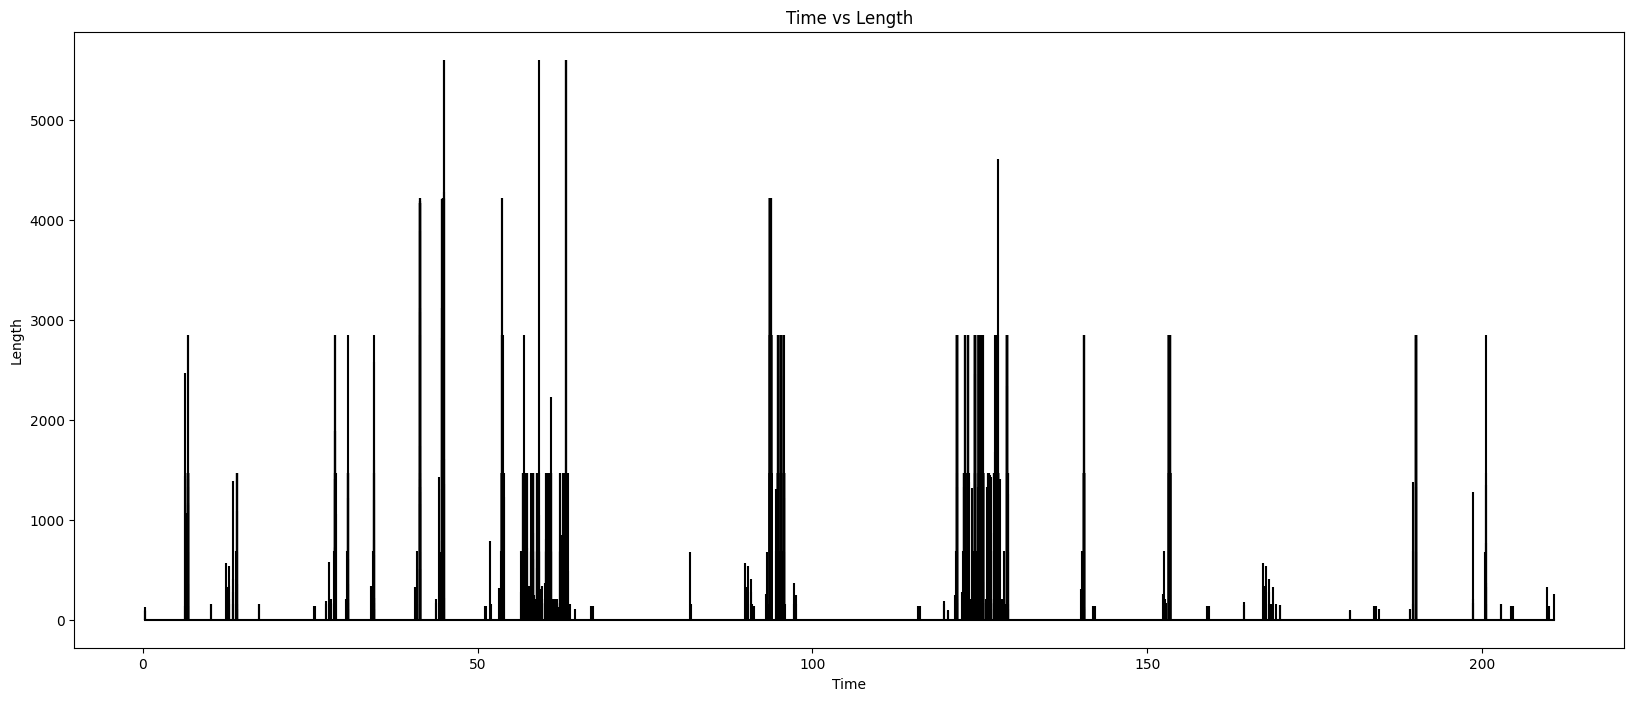

In [44]:
time = pictures_data_filtered['Time']
len = pictures_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [45]:
picture_time_diff = pictures_data_filtered['Time'].diff().shift(-1)
picture_time_diff

0       0.000263
1       0.088553
2       5.850824
8       0.023208
9       0.078534
          ...   
4415    0.218842
4417    5.122535
4421    0.257834
4423    0.764581
4427         NaN
Name: Time, Length: 1439, dtype: float64

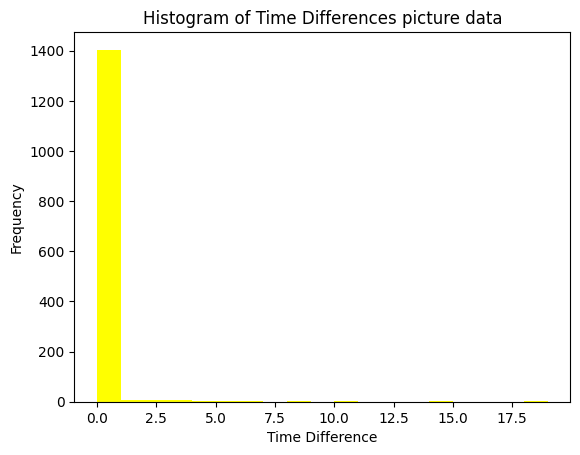

In [46]:
bins = range(0,20) 

# Histogram 
plt.hist(picture_time_diff, bins=bins,color= 'yellow')

# Labels  
plt.xlabel('Time Difference')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Time Differences picture data')
# Show plot
plt.show()

### Video Group 

In [47]:
video_data = pd.read_csv("video_data.csv", encoding='latin-1')
video_data

FileNotFoundError: [Errno 2] No such file or directory: 'video_data.csv'

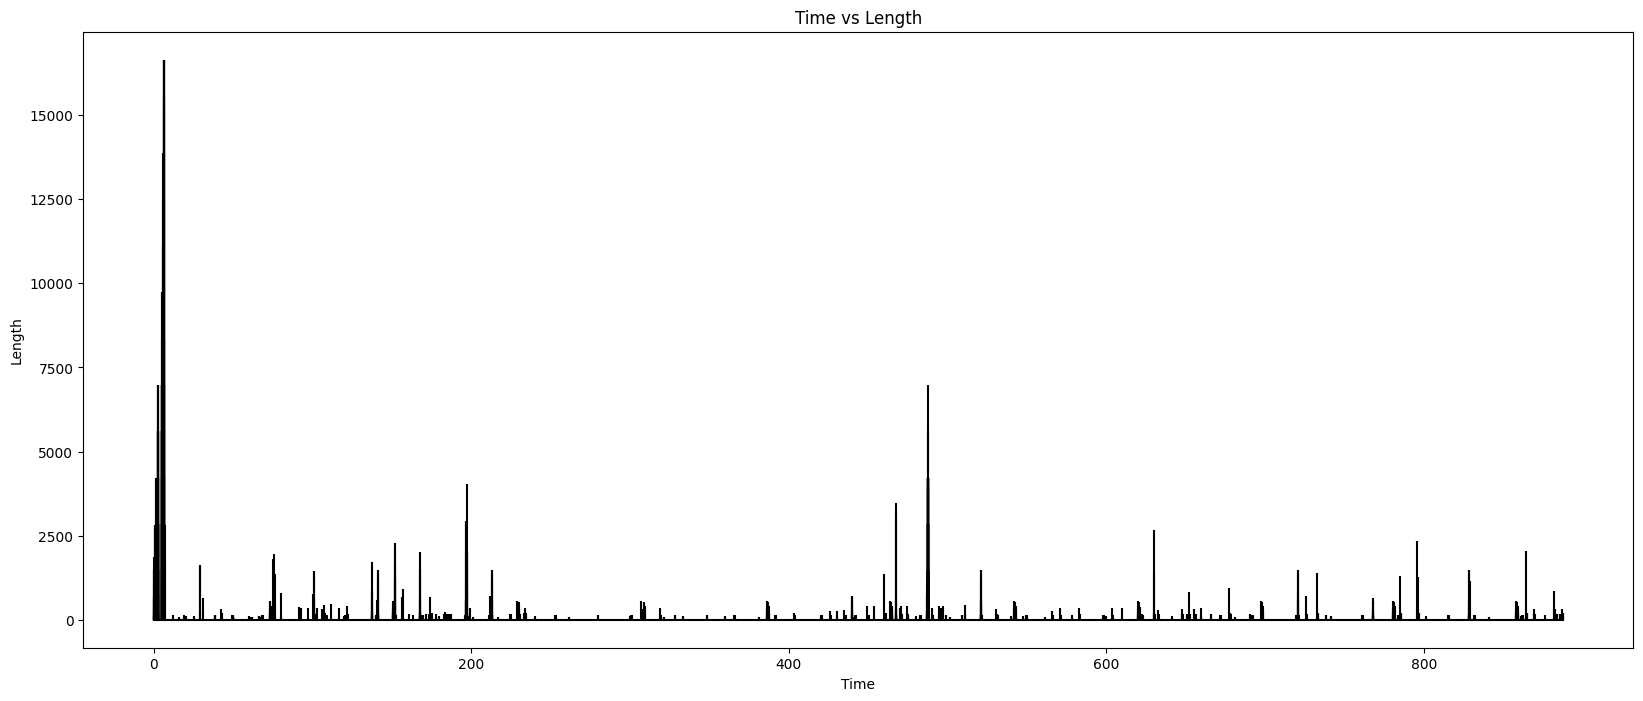

In [37]:
video_data_filtered = video_data[video_data['Protocol'].str.contains('TLS')] 

time = video_data_filtered['Time']
len = video_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [4]:
filter_src_dst = video_data.loc[(video_data['Source']=='157.240.251.60') | (video_data['Destination']=='157.240.251.60')]
filter_src_dst = filter_src_dst.loc[filter_src_dst['Length'] > 100]
filter_src_dst

,No.,Time,Source,Destination,Protocol,Length,Info
43,44,0.605218,192.168.1.12,157.240.251.60,TLSv1.3,583,Client Hello
46,47,0.608349,192.168.1.12,157.240.251.60,TLSv1.3,583,Client Hello
49,50,0.613741,192.168.1.12,157.240.251.60,TLSv1.3,583,Client Hello
52,53,0.673283,157.240.251.60,192.168.1.12,TLSv1.3,1446,"Server Hello, Application Data"
55,56,0.675457,157.240.251.60,192.168.1.12,TLSv1.3,1446,Application Data [TCP segment of a reassembled...
...,...,...,...,...,...,...,...
2286,2287,100.930742,157.240.251.60,192.168.1.12,TCP,1446,443 > 57764 [ACK] Seq=16895 Ack=1360 Win=683...
2287,2288,100.931485,157.240.251.60,192.168.1.12,TCP,1446,"443 > 57764 [PSH, ACK] Seq=18275 Ack=1360 Wi..."
2293,2294,101.201721,157.240.251.60,192.168.1.12,TLSv1.3,602,Application Data
2533,2534,156.718201,192.168.1.12,157.240.251.60,TLSv1.3,670,Application Data


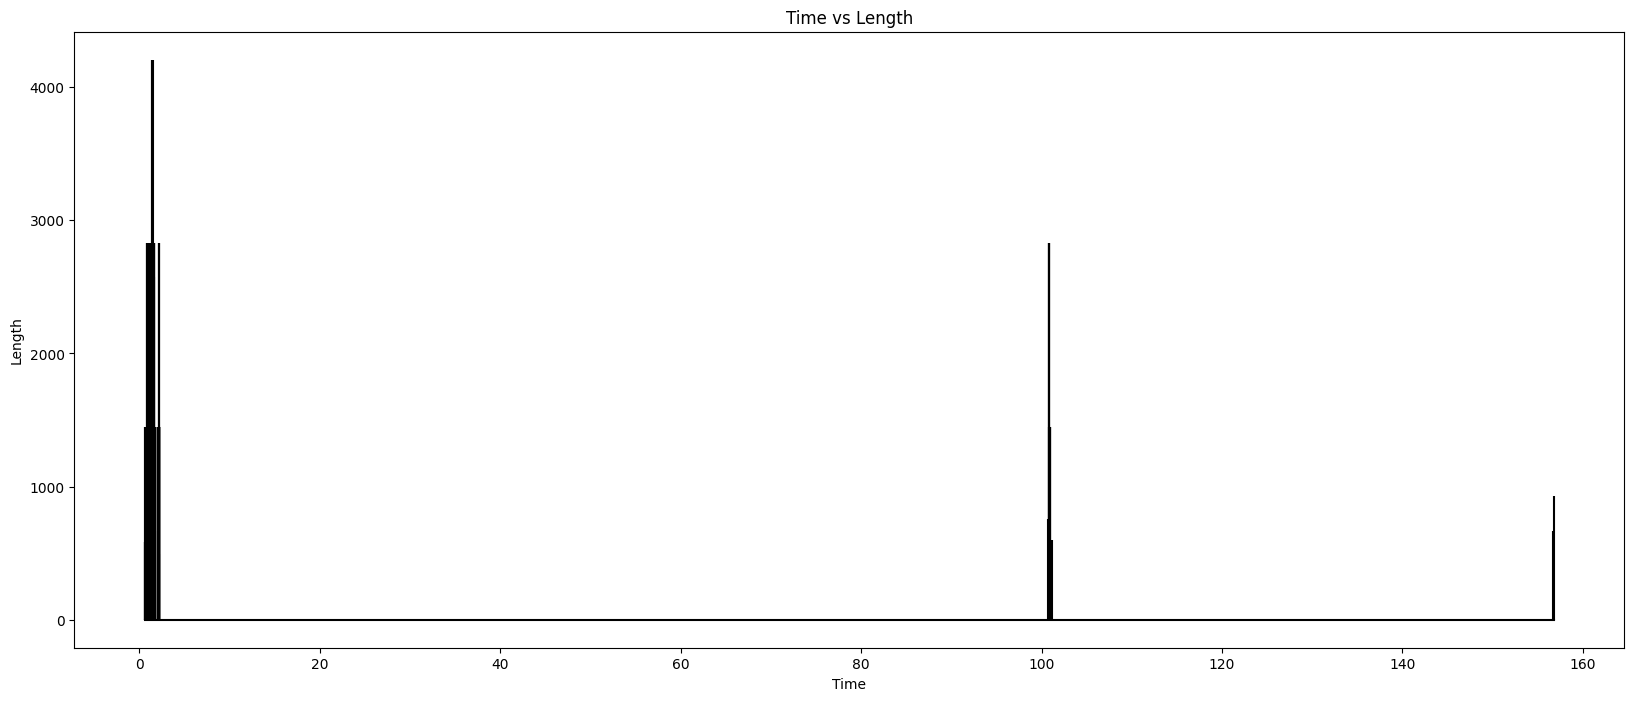

In [39]:
time = filter_src_dst['Time']
len = filter_src_dst['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [32]:
video_time_diff = filter_src_dst['Time'].diff().shift(-1)
video_time_diff

43       0.003131
46       0.005391
49       0.059542
52       0.002174
55       0.002148
          ...    
2286     0.000743
2287     0.270236
2293    55.516480
2533     0.074029
2535          NaN
Name: Time, Length: 665, dtype: float64

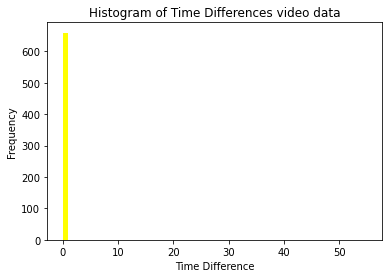

In [38]:
bins = range(0,56) 

# Histogram 
plt.hist(video_time_diff, bins=bins,color= 'yellow')

# Labels  
plt.xlabel('Time Difference')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Time Differences video data')
# Show plot
plt.show()

### Voice Group 

In [6]:
voice_data = pd.read_csv("voice_data.csv")
voice_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,192.168.1.1,224.0.0.1,IGMPv2,42,"Membership Query, general"
1,2,2.420000e-07,192.168.1.1,224.0.0.1,IGMPv3,46,"Membership Query, general"
2,3,2.870000e-07,fe80::e2ce:c3ff:fe1a:1978,ff02::1,ICMPv6,90,Multicast Listener Query
3,4,2.021001e-01,192.168.1.15,224.0.0.251,IGMPv2,46,Membership Report group 224.0.0.251
4,5,1.431816e+00,fe80::e2ce:c3ff:fe1a:1978,ff02::1,ICMPv6,174,Router Advertisement from e0:ce:c3:1a:19:78


In [18]:
voice_data_filtered = voice_data[voice_data['Protocol'].str.contains('TLS')] 

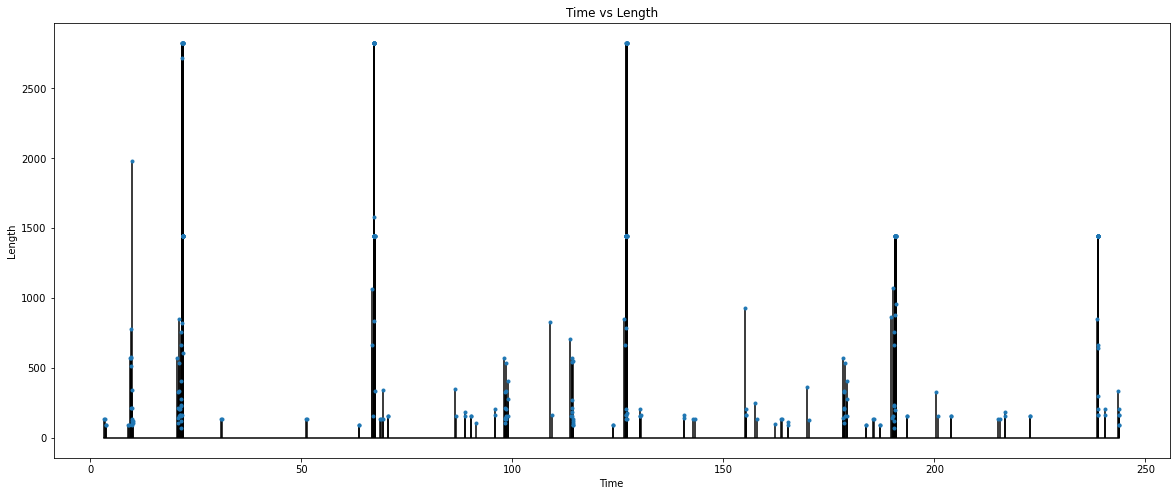

In [19]:
voice_time = voice_data_filtered['Time']
voice_len = voice_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(voice_time, voice_len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [21]:
voice_time_diff = voice_data_filtered['Time'].diff().shift(-1)
voice_time_diff

7       0.205023
9       0.204731
11      0.000519
12      5.225791
17      0.082393
          ...   
1130    0.000208
1131    0.024080
1132    0.003244
1134    0.004662
1135         NaN
Name: Time, Length: 315, dtype: float64

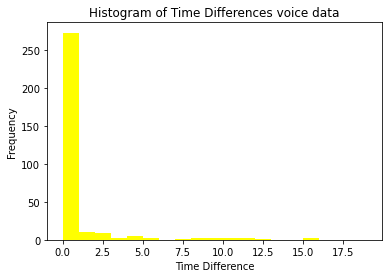

In [29]:
bins = range(0, 20) 

# Histogram 
plt.hist(voice_time_diff, bins=bins,color= 'yellow')

# Labels  
plt.xlabel('Time Difference')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Time Differences voice data')
# Show plot
plt.show()

### Text Group

In [7]:
text_data = pd.read_csv("text_data.csv", encoding='latin-1')
text_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,192.168.1.18,224.0.0.251,MDNS,101,Standard query 0x0000 SRV Roku 3 1GJ37V01468...
1,2,2.210000e-07,192.168.1.18,224.0.0.251,MDNS,182,"Standard query response 0x0000 SRV, cache flus..."
2,3,2.557890e+00,192.168.1.10,224.0.0.251,MDNS,91,"Standard query 0x0000 PTR _raop._tcp.local, ""Q..."
3,4,4.400858e+00,157.240.221.60,192.168.1.12,TLSv1.2,433,Application Data
4,5,4.444965e+00,192.168.1.12,157.240.221.60,TCP,66,45474 > 443 [ACK] Seq=1 Ack=368 Win=1015 Len...


In [10]:
text_data_filtered = text_data[text_data['Protocol'].str.contains('TLS')] 

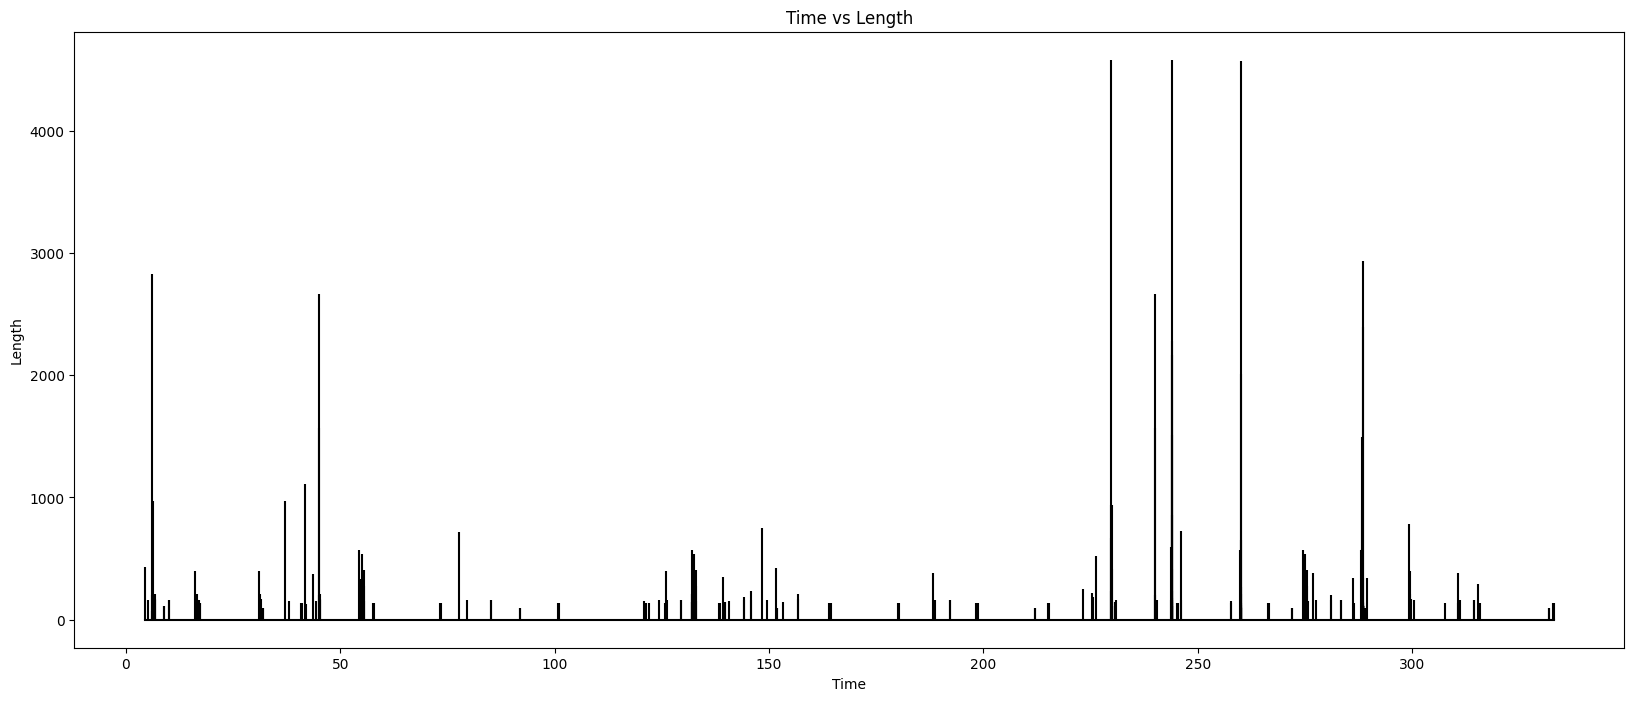

In [12]:
time = text_data_filtered['Time']
len = text_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [11]:
#filtered length lower than 100 because it is likely to be noise
text_noise_filter = text_data_filtered.loc[text_data_filtered['Length'] > 100]
text_noise_filter

,No.,Time,Source,Destination,Protocol,Length,Info
3,4,4.400858,157.240.221.60,192.168.1.12,TLSv1.2,433,Application Data
5,6,5.030028,192.168.1.12,157.240.221.60,TLSv1.2,165,Application Data
9,10,6.040854,157.240.221.60,192.168.1.12,TLSv1.2,199,Application Data
10,11,6.040854,157.240.221.60,192.168.1.12,TLSv1.2,2826,Application Data
17,18,6.318625,192.168.1.12,157.240.221.60,TLSv1.2,159,Application Data
...,...,...,...,...,...,...,...
919,920,314.373728,192.168.1.12,157.240.221.60,TLSv1.2,158,Application Data
921,922,315.495616,157.240.221.60,192.168.1.12,TLSv1.2,290,Application Data
925,926,315.949102,192.168.1.12,157.240.221.60,TLSv1.2,139,Application Data
950,951,332.817430,192.168.1.12,157.240.221.60,TLSv1.2,135,Application Data


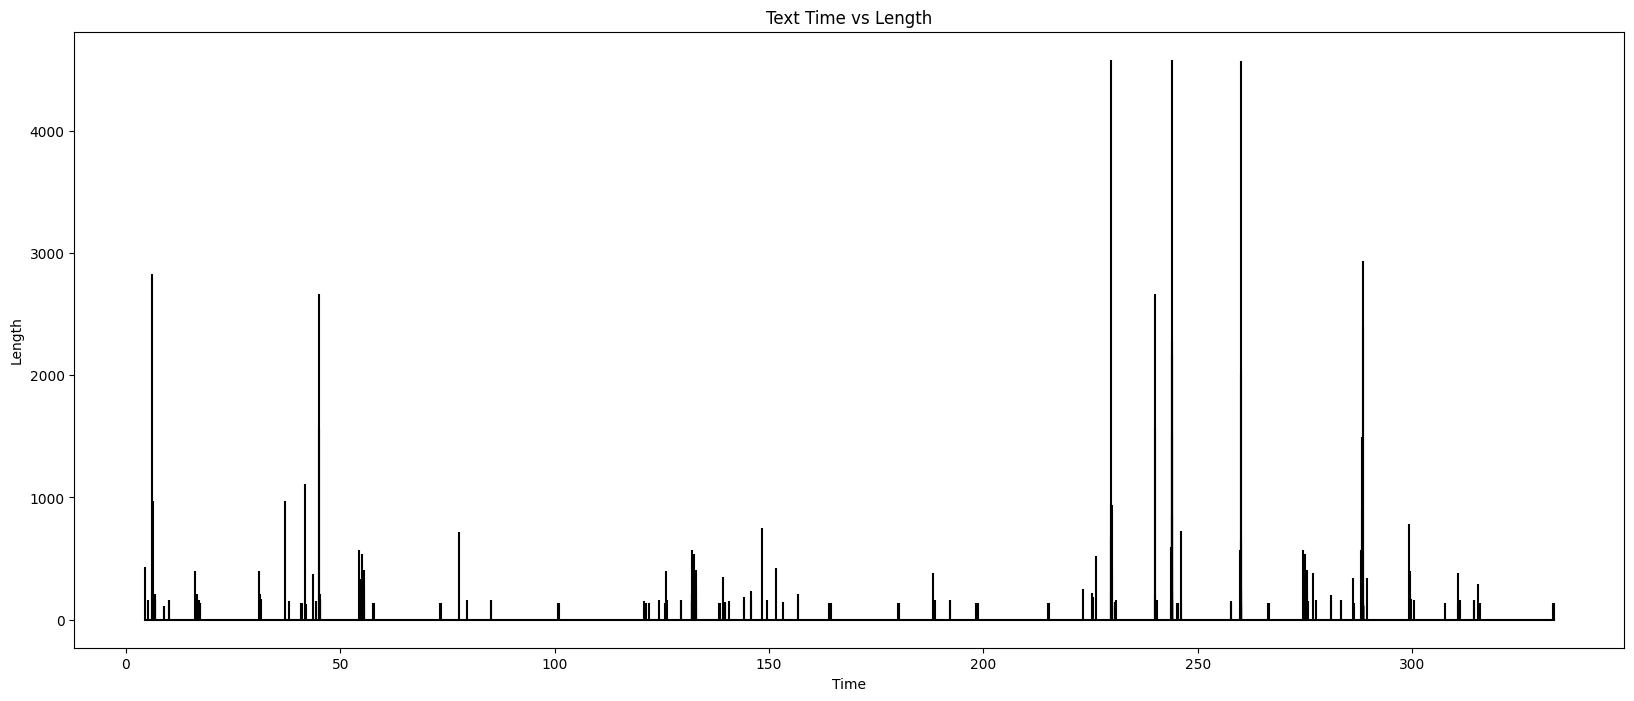

In [15]:
new_time = text_noise_filter['Time']
new_length = text_noise_filter['Length']
plt.figure(figsize=(20,8)) 
plt.stem(new_time, new_length,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Text Time vs Length')
plt.show()

In [12]:
text_time_diff = text_noise_filter['Time'].diff().shift(-1)
text_time_diff

3      6.291695e-01
5      1.010826e+00
9      7.800000e-08
10     2.777710e-01
17     8.692571e-02
           ...     
919    1.121888e+00
921    4.534866e-01
925    1.686833e+01
950    2.908129e-01
952             NaN
Name: Time, Length: 230, dtype: float64

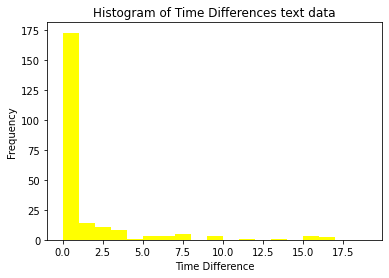

In [30]:
bins = range(0, 20) 

# Histogram 
plt.hist(text_time_diff, bins=bins,color= 'yellow')

# Labels  
plt.xlabel('Time Difference')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Time Differences text data')
# Show plot
plt.show()

To determine which data can be considered noise and filtered out,<br>
we conducted an experiment where we recorded the transmission of the smallest message size within the group.<br>
This experiment was performed twice, in two separate trials.

The data graphs from the experiment showed that any packets with a size less than 200 bytes were extraneous to the message transmission.<br> Based on these results, we can conclude that packets under 200 bytes can be assumed to be network noise unrelated to the core messages.<br> Therefore, packets smaller than 200 bytes can be safely filtered out without losing meaningful message data.

In [14]:
#test noise size

smallest_text_check1 = pd.read_csv("smallest_text_data.csv", encoding='latin-1')
smallest_text_check1.head(3)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.12,157.240.253.60,TLSv1.2,92,Application Data
1,2,0.000058,192.168.1.12,157.240.253.60,TCP,68,"43198 > 443 [FIN, ACK] Seq=25 Ack=1 Win=501 ..."
2,3,0.004511,192.168.1.12,157.240.253.60,TLSv1.2,92,Application Data


In [15]:

smallest_text_check2 = pd.read_csv("smallest_text_data2.csv", encoding='latin-1')
smallest_text_check2.head(3)

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,1.638712,157.240.221.60,192.168.1.12,TLSv1.2,145,Application Data
1,3,1.638744,192.168.1.12,157.240.221.60,TCP,68,55824 > 443 [ACK] Seq=1 Ack=78 Win=2849 Len=...
2,7,4.367951,192.168.1.12,157.240.221.60,TLSv1.2,686,Application Data


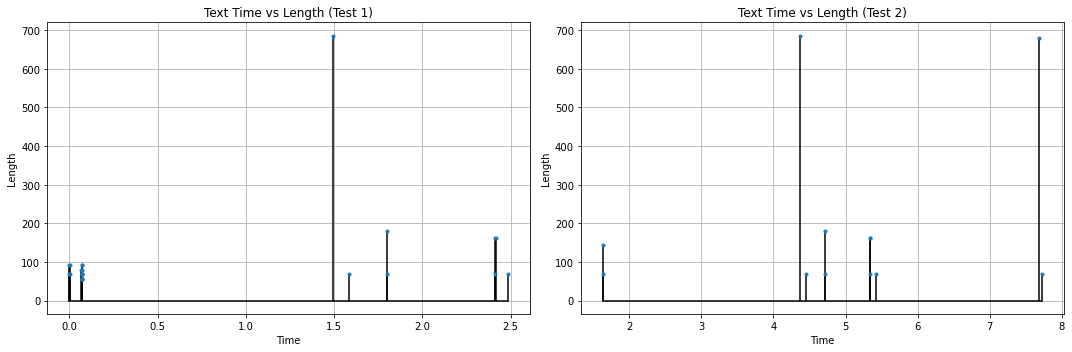

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 

test1_time = smallest_text_check1['Time']
test1_length = smallest_text_check1['Length']
ax1.stem(test1_time, test1_length, linefmt ='black', markerfmt = '', basefmt='black')
ax1.set_xlabel('Time')
ax1.set_ylabel('Length')
ax1.set_title('Text Time vs Length (Test 1)')
ax1.grid()

test2_time = smallest_text_check2['Time']
test2_length = smallest_text_check2['Length']
ax2.stem(test2_time, test2_length, linefmt ='black', markerfmt = '', basefmt='black') 
ax2.set_xlabel('Time')
ax2.set_ylabel('Length')
ax2.set_title('Text Time vs Length (Test 2)')
ax2.grid()
fig.tight_layout()
plt.show()

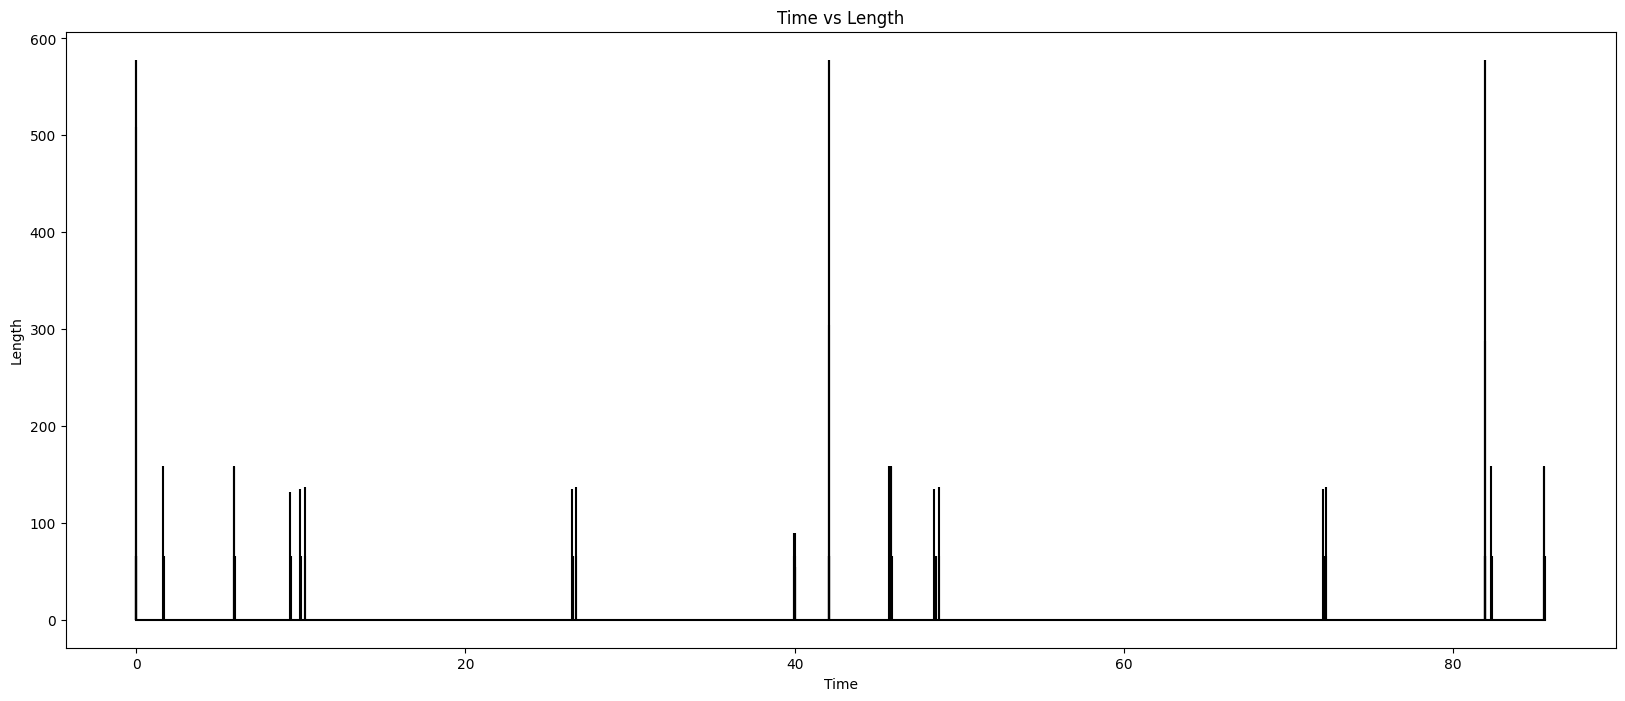

In [23]:
"""
We sent the same video 3 times, with a difference of 40 seconds between each sending, 
in order to observe how the data packets were transmitted. 
We filtered the network traffic (port = 443).
"""
video_iterations = pd.read_csv("video_iterations.csv", encoding='latin-1')

time = video_iterations['Time']
len = video_iterations['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()